In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt
from torch.nn import Linear, MSELoss, functional as F
%matplotlib inline

In [2]:
import torch.nn as nn

In [3]:
number_datapoints = 300000
x_from = -20
x_to = 20

In [4]:
# generate data
X = torch.linspace(x_from, x_to, steps=number_datapoints)


In [5]:
X = X.reshape(-1, 1)

In [6]:
def y_fun(x):
    return 5 * x + 18

In [7]:
y = y_fun(X)

In [8]:
torch.manual_seed(100)
e = torch.randint(-3, 3, (number_datapoints, 1), dtype=torch.float)
y_noise =  y + e

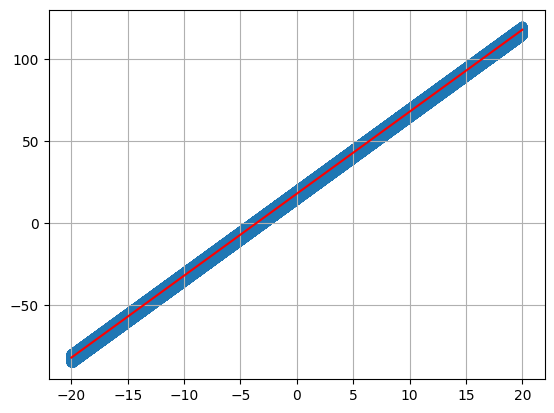

In [9]:
plt.scatter(X.numpy(), y_noise.numpy())
plt.plot(X.numpy(), y.numpy(), 'r')
plt.grid()



In [10]:
class NN(nn.Module):
    def __init__(self, h1=10):
        super().__init__()
        self.fc1 = nn.Linear(1, h1)    # input layer
        self.out = nn.Linear(h1, 1)   # output layer
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.out(x)
        return x
        

In [11]:
torch.manual_seed(44)
model = NN()


In [12]:
criterion = nn.MSELoss()

In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
epochs = 520


In [15]:
losses = []


In [16]:
import time
start = time.time()
for epoch in range(epochs):
    epoch = epoch + 1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y_noise)
    losses.append(loss)
    if epoch%10 == 0:
        print(f'epoch {epoch} loss {loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
end = time.time() - start
print(f'total time {end}')

epoch 10 loss 2266.030517578125
epoch 20 loss 1466.91796875
epoch 30 loss 773.946533203125
epoch 40 loss 322.5335998535156
epoch 50 loss 169.84410095214844
epoch 60 loss 160.65457153320312
epoch 70 loss 140.773193359375
epoch 80 loss 117.00602722167969
epoch 90 loss 102.9135971069336
epoch 100 loss 90.48713684082031
epoch 110 loss 78.75867462158203
epoch 120 loss 68.47415924072266
epoch 130 loss 59.193748474121094
epoch 140 loss 50.831634521484375
epoch 150 loss 43.37592315673828
epoch 160 loss 36.75930404663086
epoch 170 loss 30.940250396728516
epoch 180 loss 25.873239517211914
epoch 190 loss 21.508838653564453
epoch 200 loss 17.794668197631836
epoch 210 loss 14.674336433410645
epoch 220 loss 12.088693618774414
epoch 230 loss 9.976868629455566
epoch 240 loss 8.277731895446777
epoch 250 loss 6.931611061096191
epoch 260 loss 5.881823539733887
epoch 270 loss 5.076085090637207
epoch 280 loss 4.467470645904541
epoch 290 loss 4.015021800994873
epoch 300 loss 3.6839258670806885
epoch 310 los

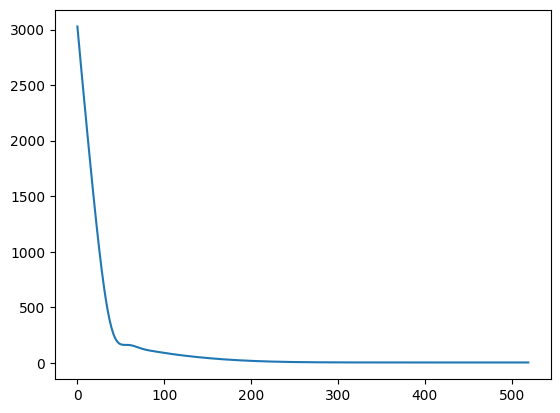

In [17]:
with torch.no_grad():
    plt.plot(range(epochs), losses)

In [18]:
with torch.no_grad():
    y_val = model.forward(X)

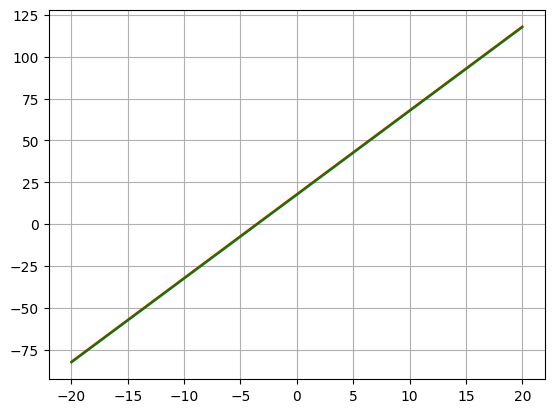

In [19]:
#plt.scatter(X.numpy(), y_noise.numpy())
plt.plot(X.numpy(), y.numpy(), 'r')
plt.plot(X.numpy(), y_val.numpy(), 'g')
plt.grid()

In [20]:
# Fast dirty test for unseen X here
# You'll see that the predictions are not that bad given the model has been trained on the data + noise
# The point is to compare the difference between training the model on GPU as opposed to training it on CPU


x_new = 25.0
with torch.no_grad():
    y_actual = model.forward(torch.tensor([[x_new]]))

print(f'For unseen x: {x_new} not in the [{x_from}, {x_to}] interval')
print(f'Expected: {y_fun(x_new)}, Predicted: {y_actual.item()}')

For unseen x: 25.0 not in the [-20, 20] interval
Expected: 143.0, Predicted: 142.4840545654297
